In [1]:
import quandl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
oil = quandl.get('NSE/OIL', authtoken='vEjGTysiCFBuN-z5bjGP',
                start_date='1980-01-01',
                end_date = '2022-05-20')

In [3]:
oil.tail(5)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-12-31,178.10,179.00,174.35,175.00,174.80,761462.0,1343.75
2019-01-01,175.00,176.40,174.15,175.15,175.75,381570.0,669.16
2019-01-02,175.80,176.20,171.00,172.35,172.40,722532.0,1251.85
2019-01-03,172.80,175.70,171.50,172.00,172.00,698190.0,1212.34
2019-01-04,172.05,174.95,172.05,174.55,174.55,431122.0,749.99


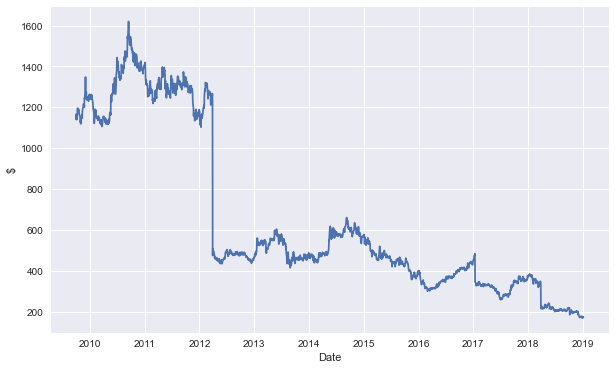

In [4]:
plt.figure(figsize=(10,6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.savefig('Oil_Price.png')
plt.show()

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
        
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose




In [6]:
ticker = '^GSPC'
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2022,5, 19)
SP_prices = yf.download(ticker, start=start, end=end, interval='1mo').Close


[*********************100%***********************]  1 of 1 completed


In [7]:
SP_prices.head()

Date
2015-01-01    1994.989990
2015-02-01    2104.500000
2015-03-01    2067.889893
2015-04-01    2085.510010
2015-05-01    2107.389893
Name: Close, dtype: float64

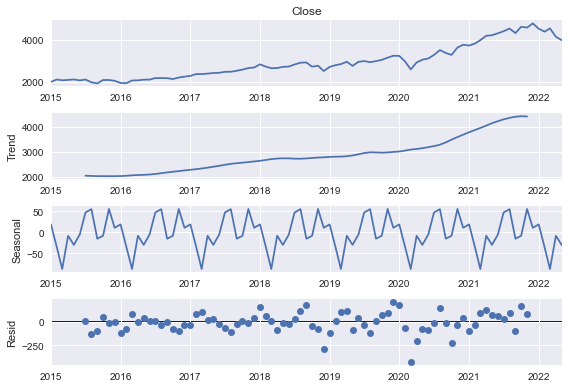

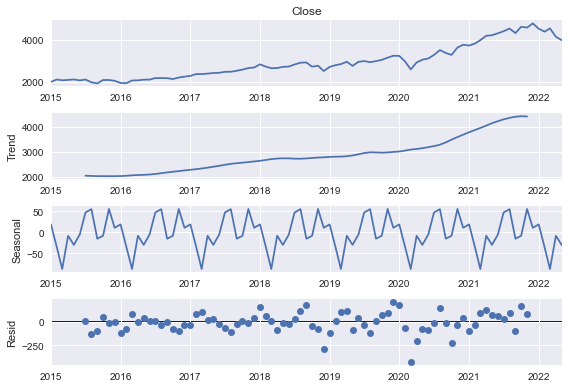

In [8]:
seasonal_decompose(SP_prices, period=12).plot()

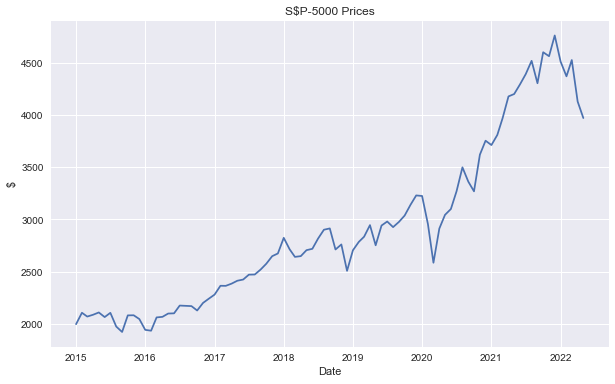

In [9]:
plt.figure(figsize=(10,6))
plt.plot(SP_prices)
plt.title('S$P-5000 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.savefig('SP_price.png')
plt.show()

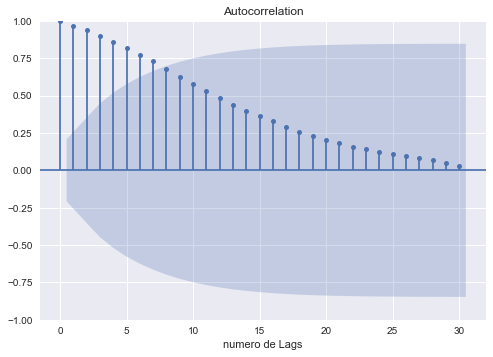

In [10]:
#Autocorrelação da funcao Ploting
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel('numero de Lags')
plt.savefig('acf_SO.png')
plt.show()


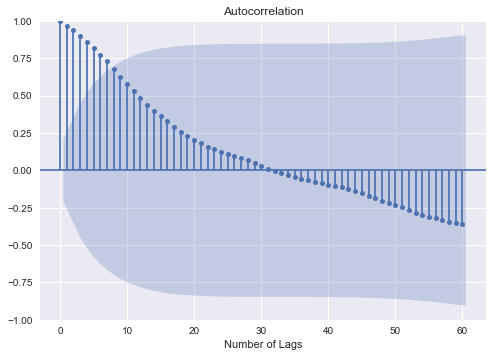

In [11]:
sm.graphics.tsa.plot_acf(SP_prices, lags=60)
plt.xlabel('Number of Lags')
plt.show()

In [12]:
#Sazonal
from fredapi import Fred
import statsmodels.api as sm

In [13]:
fred=Fred(api_key='78b14ec6ba46f484b94db43694468bb1')

In [14]:
energy = fred.get_series('CAPUTLG2211A2S',
         observation_start="2010-01-01",
         observation_end="2020-12-31")
energy.head(12)

2010-01-01    83.7028
2010-02-01    84.9324
2010-03-01    82.0379
2010-04-01    79.5073
2010-05-01    82.8055
2010-06-01    84.4108
2010-07-01    83.6338
2010-08-01    83.7961
2010-09-01    83.7459
2010-10-01    80.8892
2010-11-01    81.7758
2010-12-01    85.9894
dtype: float64

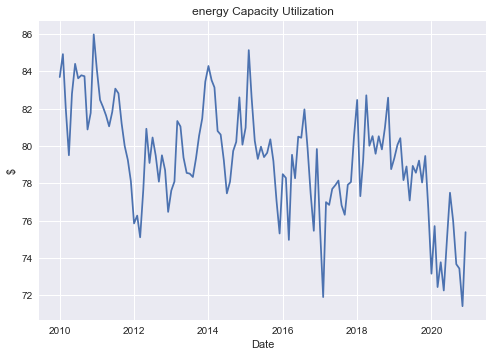

In [15]:
plt.plot(energy)
plt.title('energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.savefig('energy.png')
plt.show()


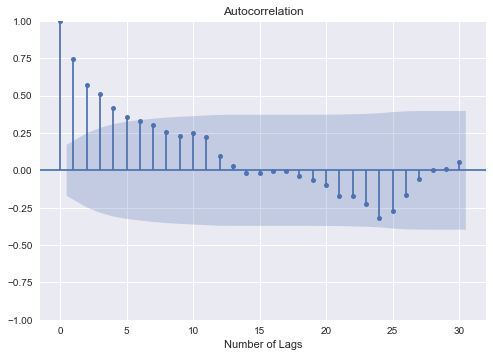

In [16]:
sm.graphics.tsa.plot_acf(energy,lags=30)
plt.xlabel('Number of Lags')
plt.savefig('energy_acf.png')
plt.show()

In [17]:
#residual
stat_test = adfuller(SP_prices)[0:2]

print("The test statistic and p-value of ADF test are {}".format(stat_test))

The test statistic and p-value of ADF test are (-0.6450522148905273, 0.860473744463262)


In [18]:
diff_SP_prices = SP_prices.diff()
diff_SP_prices.head()

Date
2015-01-01           NaN
2015-02-01    109.510010
2015-03-01    -36.610107
2015-04-01     17.620117
2015-05-01     21.879883
Name: Close, dtype: float64

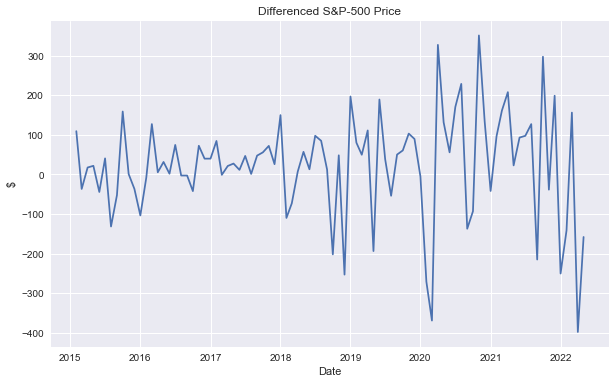

In [19]:
plt.figure(figsize=(10,6))
plt.plot(diff_SP_prices)
plt.title('Differenced S&P-500 Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.savefig('diff_SP_price.png')
plt.show()


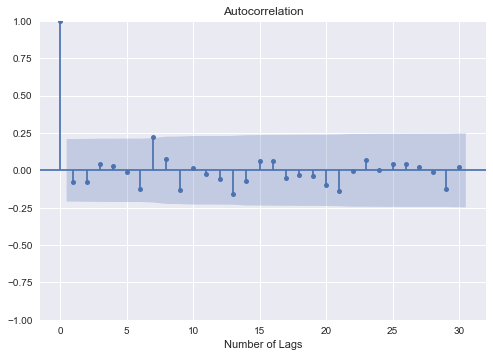

In [20]:
sm.graphics.tsa.plot_acf(diff_SP_prices.dropna(), lags=30)
plt.xlabel('Number of Lags')
plt.savefig('diff_SP_prices_ACF.png')
plt.show()


In [21]:
stat_test2=adfuller(diff_SP_prices.dropna())[0:2]
print('The Test statistic and p-value of ADF test after differencing are {}'.format(stat_test2))

The Test statistic and p-value of ADF test after differencing are (-9.89660054798001, 3.4447487246831215e-17)


In [22]:
seasonal_index = energy.resample('Q').mean()

In [23]:
dates = energy.index.year.unique()
deseasonalized = []
for i in dates:
    for j in range(1,13):
        deseasonalized.append((energy[str(i)][energy[str(i)].index.month==j]))
    concat_deseasonalized = np.concatenate(deseasonalized)

In [24]:
deseason_energy = []
for i,s in zip(range(0, len(energy), 3), range(len(seasonal_index))):
    deseason_energy.append(concat_deseasonalized[i:i+3] / seasonal_index.iloc[s])
concat_deseason_energy = np.concatenate(deseason_energy)
deseason_energy = pd.DataFrame(concat_deseason_energy, index=energy.index)
deseason_energy.columns = ['Deaseasonalized Energy']
deseason_energy.head()

,Deaseasonalized Energy
2010-01-01,1.001737
2010-02-01,1.016452
2010-03-01,0.981811
2010-04-01,0.966758
2010-05-01,1.006862


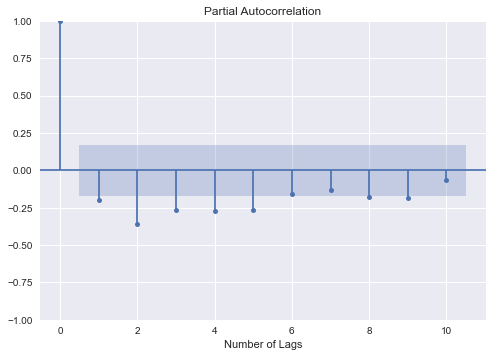

In [25]:
sm.graphics.tsa.plot_pacf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.savefig('deseason_energy_pacf.png')
plt.show()

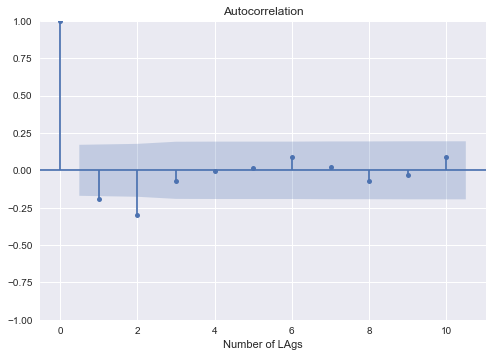

In [26]:
sm.graphics.tsa.plot_acf(deseason_energy, lags=10)
plt.xlabel('Number of LAgs')
plt.savefig('deseason_energy_acf.png')
plt.show()

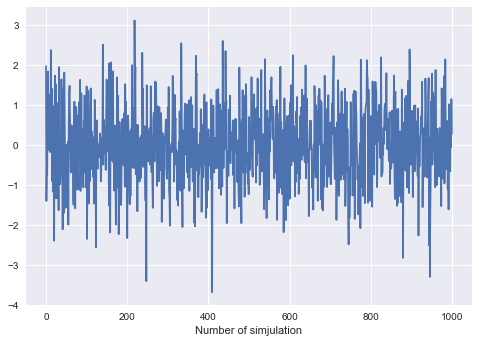

In [33]:
mu = 0
std = 1
WN = np.random.normal(mu, std, 1000)

plt.plot(WN)
plt.xlabel('Number of simjulation')
plt.savefig('WN.png')
plt.show()

In [39]:
#Modelo de media M<ovel
ticker = ['AAPL', 'MSFT']
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2021,1,1)
stock_prices = yf.download(ticker, start=start, end = end, interval='1d').Close

[*********************100%***********************]  2 of 2 completed


In [40]:
stock_prices.head()

,AAPL,MSFT
Date,,
2019-01-02,39.480000,101.120003
2019-01-03,35.547501,97.400002
2019-01-04,37.064999,101.930000
2019-01-07,36.982498,102.059998
2019-01-08,37.687500,102.800003


In [41]:
stock_prices = stock_prices.dropna()

In [42]:
for i in ticker:
    start_test = adfuller(stock_prices[i])[0:2]
    print('The ADF test statistic and p-value pf {} are {}'.format(i, stat_test))

The ADF test statistic and p-value pf AAPL are (-0.6450522148905273, 0.860473744463262)
The ADF test statistic and p-value pf MSFT are (-0.6450522148905273, 0.860473744463262)


In [43]:
diff_stock_prices = stock_prices.diff().dropna()

In [44]:
diff_stock_prices.tail()

,AAPL,MSFT
Date,,
2020-12-24,1.009995,1.729996
2020-12-28,4.720001,2.210007
2020-12-29,-1.820007,-0.810013
2020-12-30,-1.149994,-2.470001
2020-12-31,-1.029999,0.740005


In [45]:
split = int(len(diff_stock_prices['AAPL'].values)* 0.95)
diff_train_aapl = diff_stock_prices['AAPL'].iloc[:split]
diff_test_aapl = diff_stock_prices['AAPL'].iloc[split:]
diff_train_msft = diff_stock_prices['MSFT'].iloc[:split]
diff_test_msft = diff_stock_prices['MSFT'].iloc[split:]

In [46]:
diff_train_aapl.to_csv('diff_train_aapl.csv')
diff_test_aapl.to_csv('diff_test_aapl.csv')
diff_train_msft.to_csv('diff_train_msft.csv')
diff_test_msft.to_csv('diff_test_msft.csv')

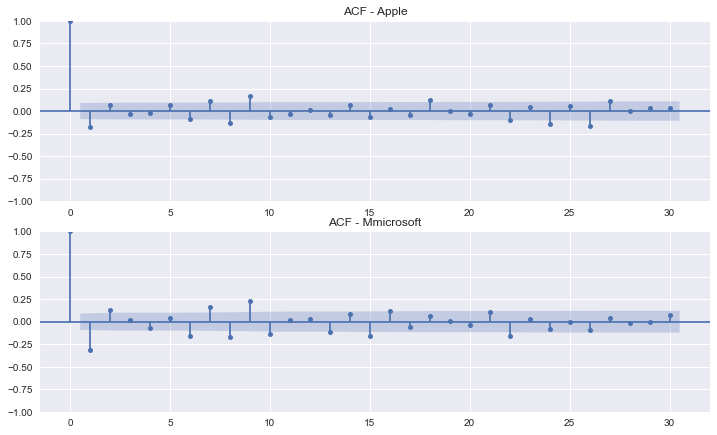

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
plt.tight_layout()
sm.graphics.tsa.plot_acf(diff_train_aapl, lags=30, ax=ax[0], title='ACF - Apple')
sm.graphics.tsa.plot_acf(diff_train_msft, lags=30, ax=ax[1], title='ACF - Mmicrosoft')
plt.savefig('acf_,a.png')
plt.show()
#ACF apos 1º Diferença

In [48]:
short_moving_average_appl = diff_train_aapl.rolling(window=9).mean()
long_moving_average_appl = diff_train_aapl.rolling(window=22).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

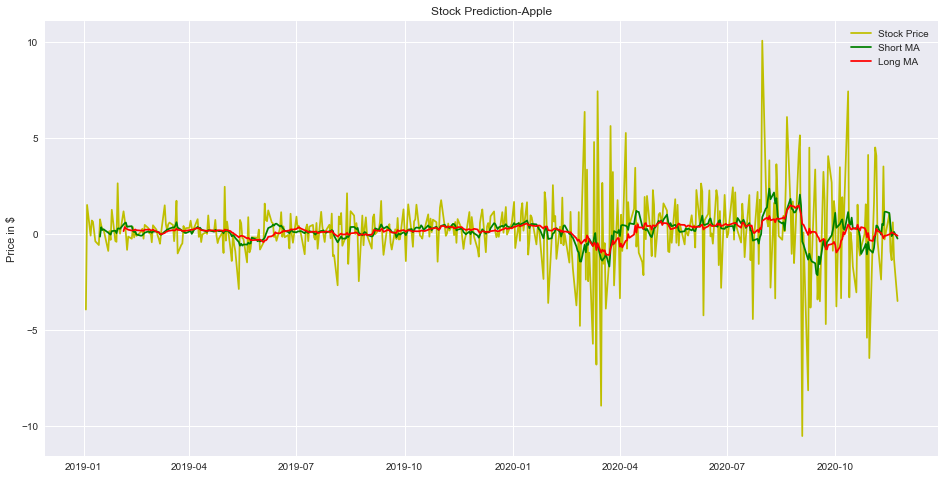

In [59]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(diff_train_aapl.loc[start:end].index,
       diff_train_aapl.loc[start:end],
      label = 'Stock Price', c='y')
ax.plot(short_moving_average_appl.loc[start:end].index,
        short_moving_average_appl.loc[start:end],
       label='Short MA', c='g')
ax.plot(long_moving_average_appl.loc[start:end].index,
        long_moving_average_appl.loc[start:end],
       label = 'Long MA', c='r')
ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.set_title('Stock Prediction-Apple')
plt.savefig('ma_apple.png')
plt.show